In [ ]:
!pip install uproot3

     |████████████████████████████████| 117 kB 5.0 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 


In [ ]:
import urllib.request # for downloading files
import pandas as pd # to store data as dataframes
import numpy as np # for numerical calculations such as histogramming
import uproot3 # to read .root files as dataframes
import matplotlib.pyplot as plt # for plotting

In [ ]:
filename = 'data_A.exactly2lep.root'
url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/Data/'+filename
urllib.request.urlretrieve(url, filename)

('data_A.exactly2lep.root', <http.client.HTTPMessage at 0x7fb96f435190>)

In [ ]:
print (data.lep_E[0])

[147913.47   21271.793]


In [ ]:
varA = data.lep_pt[0]*np.cos(data.lep_phi[0])
print (varA)

[ 32387.074 -18771.791]


In [ ]:
def calc_mll(lep_pt,lep_eta,lep_phi,lep_E): # lepton pt,eta,phi,energy
    
    # 0th lepton is [0], next lepton is [1] etc
    # get the energy of 0th lepton by lep_E[0]

    # sumE = sum of energy
    sumE = lep_E[0] + lep_E[1]
    
    # sumpx = sum of x-momenta
    sumpx = lep_pt[0]*np.cos(lep_phi[0]) + lep_pt[1]*np.cos(lep_phi[1])
    
    # sumpy = sum of y-momenta
    sumpy = lep_pt[0]*np.sin(lep_phi[0]) + lep_pt[1]*np.sin(lep_phi[1]) 
    
    # sumpz = sum of z-momenta
    sumpz = lep_pt[0]*np.sinh(lep_eta[0]) + lep_pt[1]*np.sinh(lep_eta[1])
    
    # sump = magnitude of total momentum vector. Remember it's a vector!
    sump = np.sqrt(sumpx**2 + sumpy**2 + sumpz**2)
    
    # Mll = invariant mass from M^2 = E^2 - p^2
    Mll = np.sqrt(sumE**2 - sump**2)

    return Mll/1000 # divide by 1000 to go from MeV to GeV

In [ ]:
data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
tree = uproot3.open(filename)["mini"] # open the tree called mini
numevents = uproot3.numentries(filename, "mini") # number of events

for data in tree.iterate(['lep_pt','lep_eta','lep_phi','lep_E'], 
                         outputtype=pd.DataFrame, # choose output type as pandas DataFrame
                         entrystop=numevents*0.001): # stop after fraction of events we want to process

    # calculation of 2-lepton invariant mass                                                                                                                                      
    data['mll'] = np.vectorize(calc_mll)(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)

    data_all = data_all.append(data) # append dataframe from this batch to the dataframe for the whole sample
print (data_all)


                       lep_pt  ...        mll
entry                          ...           
0        [33144.9, 21067.385]  ...  92.150043
1      [42871.246, 37205.387]  ...  89.282450
2      [33070.188, 29222.084]  ...  88.274741
3       [28597.91, 19120.684]  ...  46.788296
4       [49459.63, 35819.855]  ...  91.529038
...                       ...  ...        ...
659    [52029.715, 33379.133]  ...  84.688580
660     [83593.78, 23400.945]  ...  88.040910
661    [48671.914, 43170.777]  ...  89.594341
662    [41093.906, 39788.887]  ...  89.651872
663    [33252.035, 11883.924]  ...  20.402977

[664 rows x 5 columns]


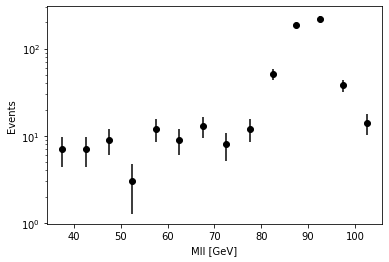

In [ ]:
bin_edges = np.arange(start=35, # The interval includes this value
                      stop=110, # The interval doesn't include this value
                      step=5 ) # Spacing between values
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2 # central values of each bin

# histogram the data
data_x,_ = np.histogram(data_all['mll'], bins=bin_edges ) 

# statistical error on the data
data_x_errors = np.sqrt(data_x)

# plot the data points
plt.errorbar(x=bin_centres, 
                   y=data_x, 
                   yerr=data_x_errors,
                   fmt='ko' ) # 'k' means black and 'o' is for circles

# x-axis label
plt.xlabel('Mll [GeV]')

# y-axis label
plt.ylabel('Events')

# make the y-axis log scale
plt.yscale('log')